---
title: "k-means"
format: html
---

This notebook needs the data from https://www.kaggle.com/datasets/giatrilalla01/landsat-imagery-8 to run!!! They are about 790Mb, so not included in the script

In [92]:
using Images
using FileIO
using CairoMakie
using Statistics
using SpeciesDistributionToolkit # Ol'reliable
CairoMakie.activate!(; px_per_unit = 2)

We load the images from the `data/kmeans` folder, they are all `TIF` images, so this should not be too hard:

In [93]:
img_path = "../data/kmeans"
img_files = readdir(img_path; join=true)
filter!(contains(".TIF"), img_files)

7-element Vector{String}:
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B1.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B2.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B3.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B4.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B5.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B6.TIF"
 "../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B7.TIF"

In Landsat 8, NIR is band 5, red is band 4, so we can get the NDVI easily:

In [96]:
red_band = only(filter(contains("B4.TIF"), img_files))
nir_band = only(filter(contains("B5.TIF"), img_files))
green_band = only(filter(contains("B3.TIF"), img_files))
blue_band = only(filter(contains("B2.TIF"), img_files))
bbox = (left=-74.2, right=-73.7, bottom=45.2, top=45.7)
red = convert(Float32, SpeciesDistributionToolkit._read_geotiff(red_band, SimpleSDMResponse; bbox...));
nir = convert(Float32, SpeciesDistributionToolkit._read_geotiff(nir_band, SimpleSDMResponse; bbox...));
green = convert(Float32, SpeciesDistributionToolkit._read_geotiff(green_band, SimpleSDMResponse; bbox...));
blue = convert(Float32, SpeciesDistributionToolkit._read_geotiff(blue_band, SimpleSDMResponse; bbox...));

┌ Warning: The dataset is not in WGS84
│ We will convert it to WGS84 using gdal_warp, and write it to a temporary file.
│ This is not an apology, this is a warning.
│ Proceed with caution.
└ @ SpeciesDistributionToolkit /home/tpoisot/.julia/packages/SpeciesDistributionToolkit/kYNwg/src/io/geotiff.jl:55


Creating output file that is 9258P x 6459L.
Processing ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B4.TIF [1/1] : 0

Using internal nodata values (e.g. 0) for image ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B4.TIF.
Copying nodata values from source ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B4.TIF to destination /tmp/jl_GXY9UbGJyR.
.

..

10.

..20

.

.

.30.

..

40.

..

50.

..60

.

..

70.

.

.

80.

..

90.

..

100 - done.


┌ Warning: The dataset is not in WGS84
│ We will convert it to WGS84 using gdal_warp, and write it to a temporary file.
│ This is not an apology, this is a warning.
│ Proceed with caution.
└ @ SpeciesDistributionToolkit /home/tpoisot/.julia/packages/SpeciesDistributionToolkit/kYNwg/src/io/geotiff.jl:55


Creating output file that is 9258P x 6459L.
Processing ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B5.TIF [1/1] : 0

Using internal nodata values (e.g. 0) for image ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B5.TIF.
Copying nodata values from source ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B5.TIF to destination /tmp/jl_Kr0huVcDMR.
..

.10.

.

.20

.

..

30..

.40

..

.

50..

.60

..

.70.

.

.

80.

.

.

90.

..

100 - done.


┌ Warning: The dataset is not in WGS84
│ We will convert it to WGS84 using gdal_warp, and write it to a temporary file.
│ This is not an apology, this is a warning.
│ Proceed with caution.
└ @ SpeciesDistributionToolkit /home/tpoisot/.julia/packages/SpeciesDistributionToolkit/kYNwg/src/io/geotiff.jl:55


Creating output file that is 9258P x 6459L.
Processing ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B3.TIF [1/1] : 0

Using internal nodata values (e.g. 0) for image ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B3.TIF.
Copying nodata values from source ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B3.TIF to destination /tmp/jl_AtE9In4RET.
.

.

.10

.

.

.20

.

.

.30

.

.

.

40.

.

.

50

.

..

60

.

.

.

70.

.

.

80.

.

.

90

.

..

100 - done.


┌ Warning: The dataset is not in WGS84
│ We will convert it to WGS84 using gdal_warp, and write it to a temporary file.
│ This is not an apology, this is a warning.
│ Proceed with caution.
└ @ SpeciesDistributionToolkit /home/tpoisot/.julia/packages/SpeciesDistributionToolkit/kYNwg/src/io/geotiff.jl:55


Creating output file that is 9258P x 6459L.
Processing ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B2.TIF [1/1] : 0

Using internal nodata values (e.g. 0) for image ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B2.TIF.
Copying nodata values from source ../data/kmeans/LC09_L2SP_015028_20230730_20230802_02_T1_SR_B2.TIF to destination /tmp/jl_KrIluRYjWB.
.

.

.10

.

.

.

20

.

.

.30

.

.

.

40

.

.

.

50

.

.

.

60.

.

.

70.

.

.80

.

..

90

.

..

100 - done.


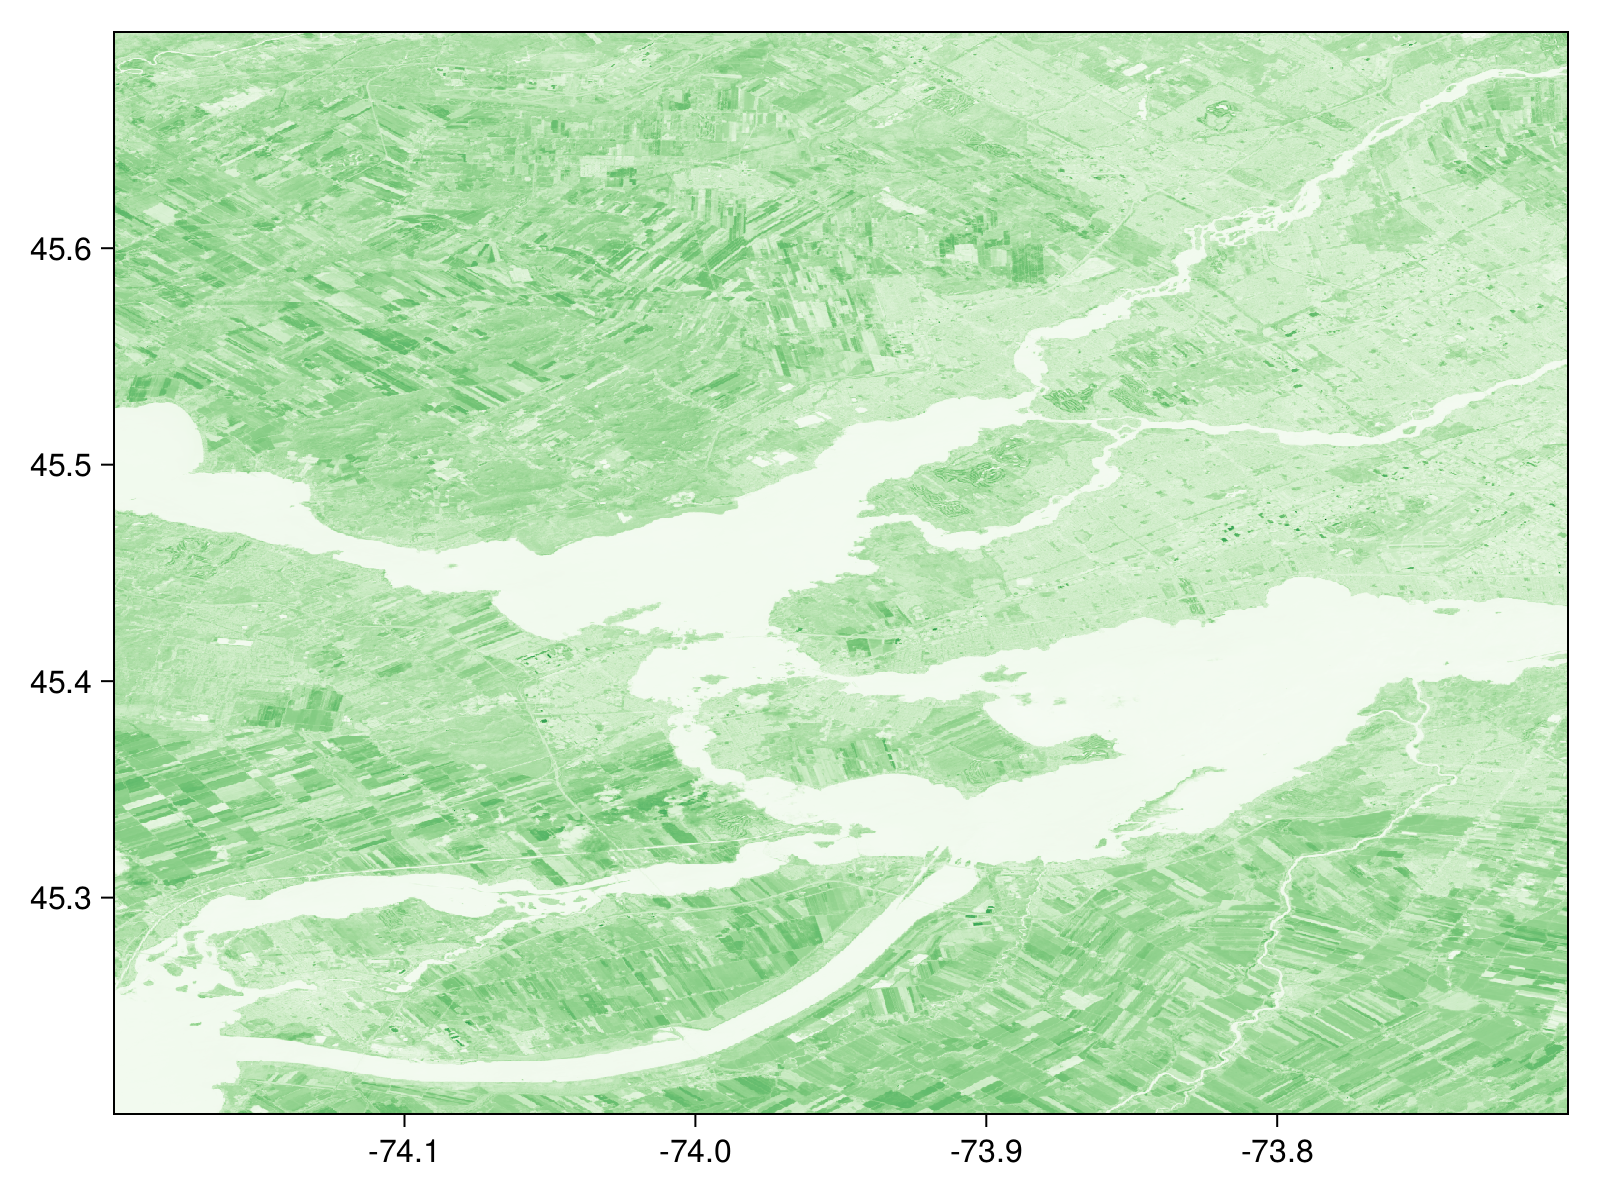

In [97]:
heatmap(nir; colormap=:Greens)

In [111]:
R = convert(Matrix{Float32}, grid(red))./65586
G = convert(Matrix{Float32}, grid(green))./65586
replace!(blue, nothing => 0.0f0)
B = convert(Matrix{Float32}, grid(blue))./65586

1504×1504 Matrix{Float32}:
 0.204238  0.204468  0.204957  0.205216  …  0.235983  0.236586  0.238283
 0.204123  0.204353  0.204986  0.204928     0.236673  0.235781  0.235551
 0.203376  0.203491  0.204526  0.204583     0.23489   0.234947  0.235005
 0.203318  0.202916  0.203663  0.204238     0.234631  0.23443   0.235724
 0.203146  0.203088  0.203404  0.204181     0.235724  0.234861  0.234689
 0.203318  0.203491  0.203692  0.203749  …  0.234717  0.234861  0.234746
 0.203519  0.203059  0.203893  0.203376     0.234574  0.2342    0.233653
 0.203951  0.204095  0.203865  0.203663     0.234947  0.234976  0.233855
 0.203404  0.203951  0.20536   0.204986     0.233941  0.234775  0.234861
 0.204468  0.204095  0.20421   0.204756     0.236816  0.236184  0.235292
 ⋮                                       ⋱                      
 0.227673  0.228219  0.228622  0.228852  …  0.237794  0.237794  0.237995
 0.228392  0.22773   0.229082  0.228507     0.237219  0.238657  0.238082
 0.2275    0.228104  0.228737  0

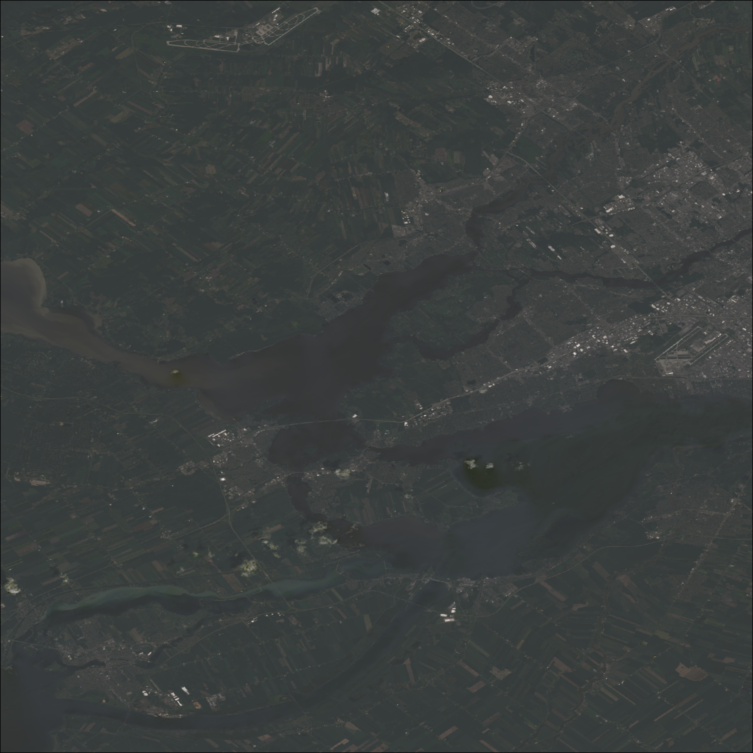

In [151]:
#| label: fig-visual
#| fig-cap: >
#|  The ...
cube = zeros(eltype(B), (3, size(B)...))
cube[1,:,:] .= R
cube[2,:,:] .= G
cube[3,:,:] .= B
rotl90(permutedims(colorview(RGB, cube)))

In [113]:
ndvi = (nir - red) / (nir + red)
ndwi = (green - nir) / (green + nir)

SDM response → 1504×1504 grid with 2262016 Float32-valued cells
  Latitudes	45.1998843751993 ⇢ 45.70004300390869
  Longitudes	-74.20002519820281 ⇢ -73.69986656949341

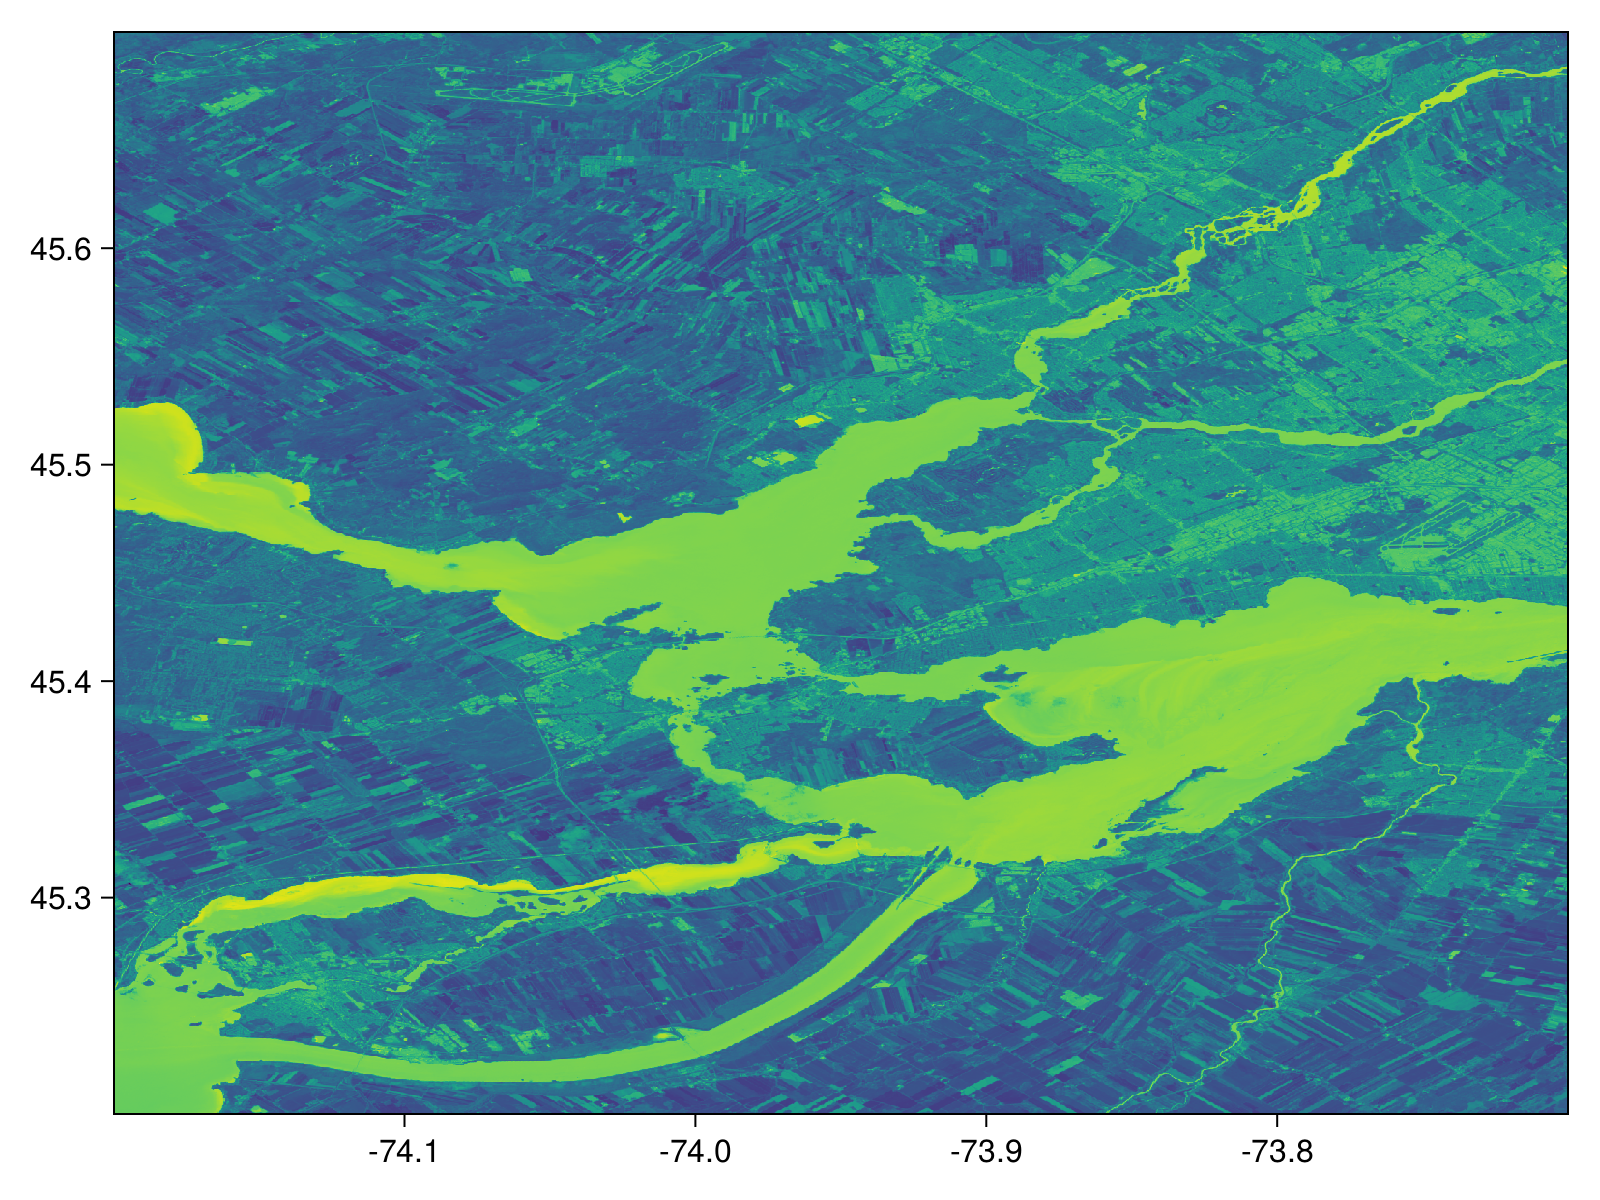

In [117]:
heatmap(ndwi)

In [124]:
X = zeros(Float32, (2, prod(size(ndvi))...))
X[1,:] .= vec(grid(ndvi))
X[2,:] .= vec(grid(ndwi))

2262016-element view(::Matrix{Float32}, 2, :) with eltype Float32:
 -0.017270615
 -0.01675274
 -0.016780216
 -0.01731547
 -0.017557155
 -0.015598358
 -0.016759073
 -0.015871016
 -0.01700659
 -0.016488358
  ⋮
 -0.50322723
 -0.5036999
 -0.50399613
 -0.47218388
 -0.36019796
 -0.45437452
 -0.47516528
 -0.4829252
 -0.49575502

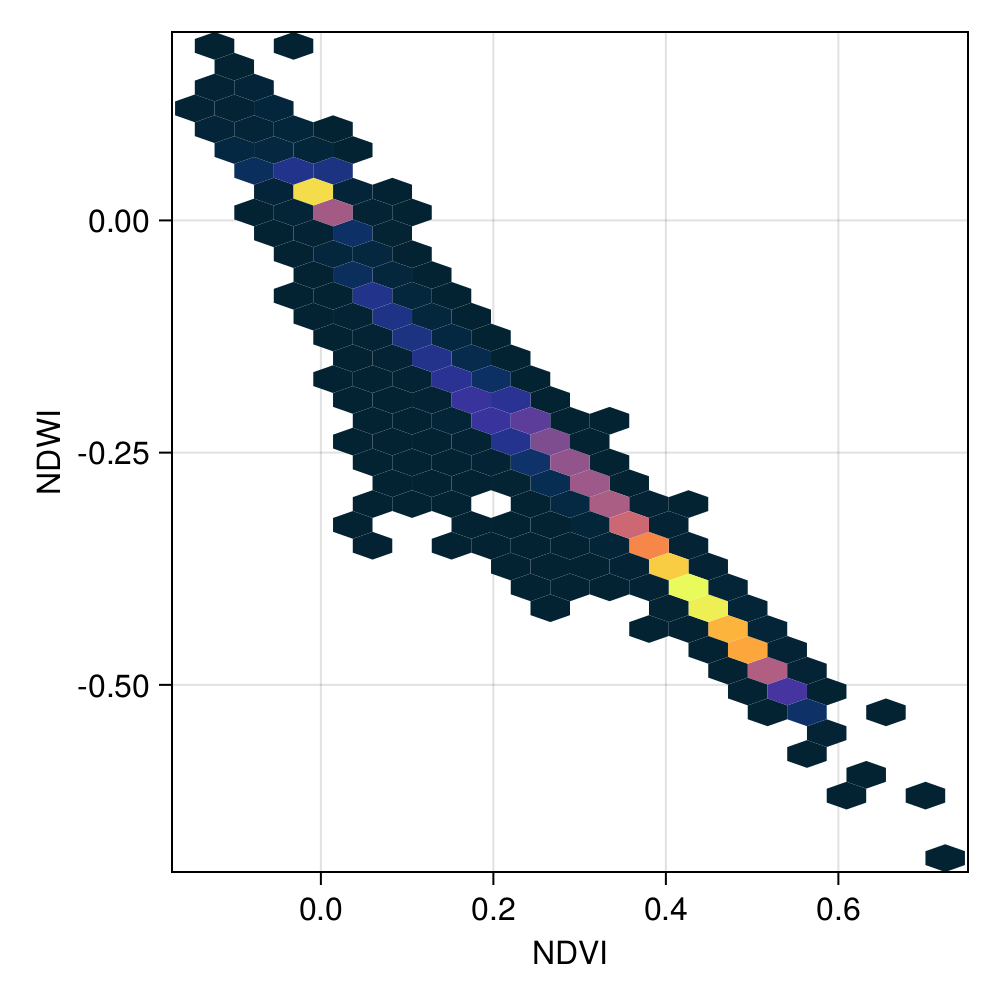

In [119]:
#| label: fig-hexbin
#| fig-cap: >
#|  The pixels acquired from Landsat 8 exist in a space with many different dimensions (one for each band).
#|  Because we are interested in a landscape classification based on water/vegetation data, we use the NDVI and NDWI 
#|  combinations of bands. Theyr are *derived* data, and represent an instance of feature engineering.
fig = Figure(resolution=(500,500))
ax = Makie.Axis(fig[1,1]; xlabel="NDVI", ylabel="NDWI")
hexbin!(ax, ndvi, ndwi, bins=40, threshold=1, colormap=:thermal)
tightlimits!(ax)
current_figure()

We need a function for kmeans

In [144]:
using Clustering
clusters = kmeans(X, 5)

┌ Warning: The clustering cost increased at iteration #54
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #57
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #61
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #62
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #65
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #67
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #70
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #72
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #75
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #78
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #79
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #81
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #85
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #86
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #88
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #89
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #90
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #92
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #96
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191
┌ Warning: The clustering cost increased at iteration #97
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


┌ Warning: The clustering cost increased at iteration #99
└ @ Clustering /home/tpoisot/.julia/packages/Clustering/yuxBr/src/kmeans.jl:191


KmeansResult{Matrix{Float32}, Float32, Int64}(Float32[0.48785827 -0.00507133 … 0.39816666 0.1446283; -0.45289925 0.024399308 … -0.3669358 -0.1507449], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  4, 1, 1, 1, 1, 4, 1, 1, 1, 1], Float32[0.0031685191, 0.0030165033, 0.003041862, 0.00318318, 0.003186121, 0.0029367288, 0.003095828, 0.002922863, 0.0031106947, 0.0030322517  …  0.003418088, 0.005509436, 0.0058154464, 0.005844176, 0.0009914637, 7.677078f-5, 7.3611736f-5, 0.0013837814, 0.002455473, 0.0046176314], [583324, 393592, 424973, 622849, 237278], [583332, 393588, 424975, 622846, 237275], 4732.362f0, 100, false)

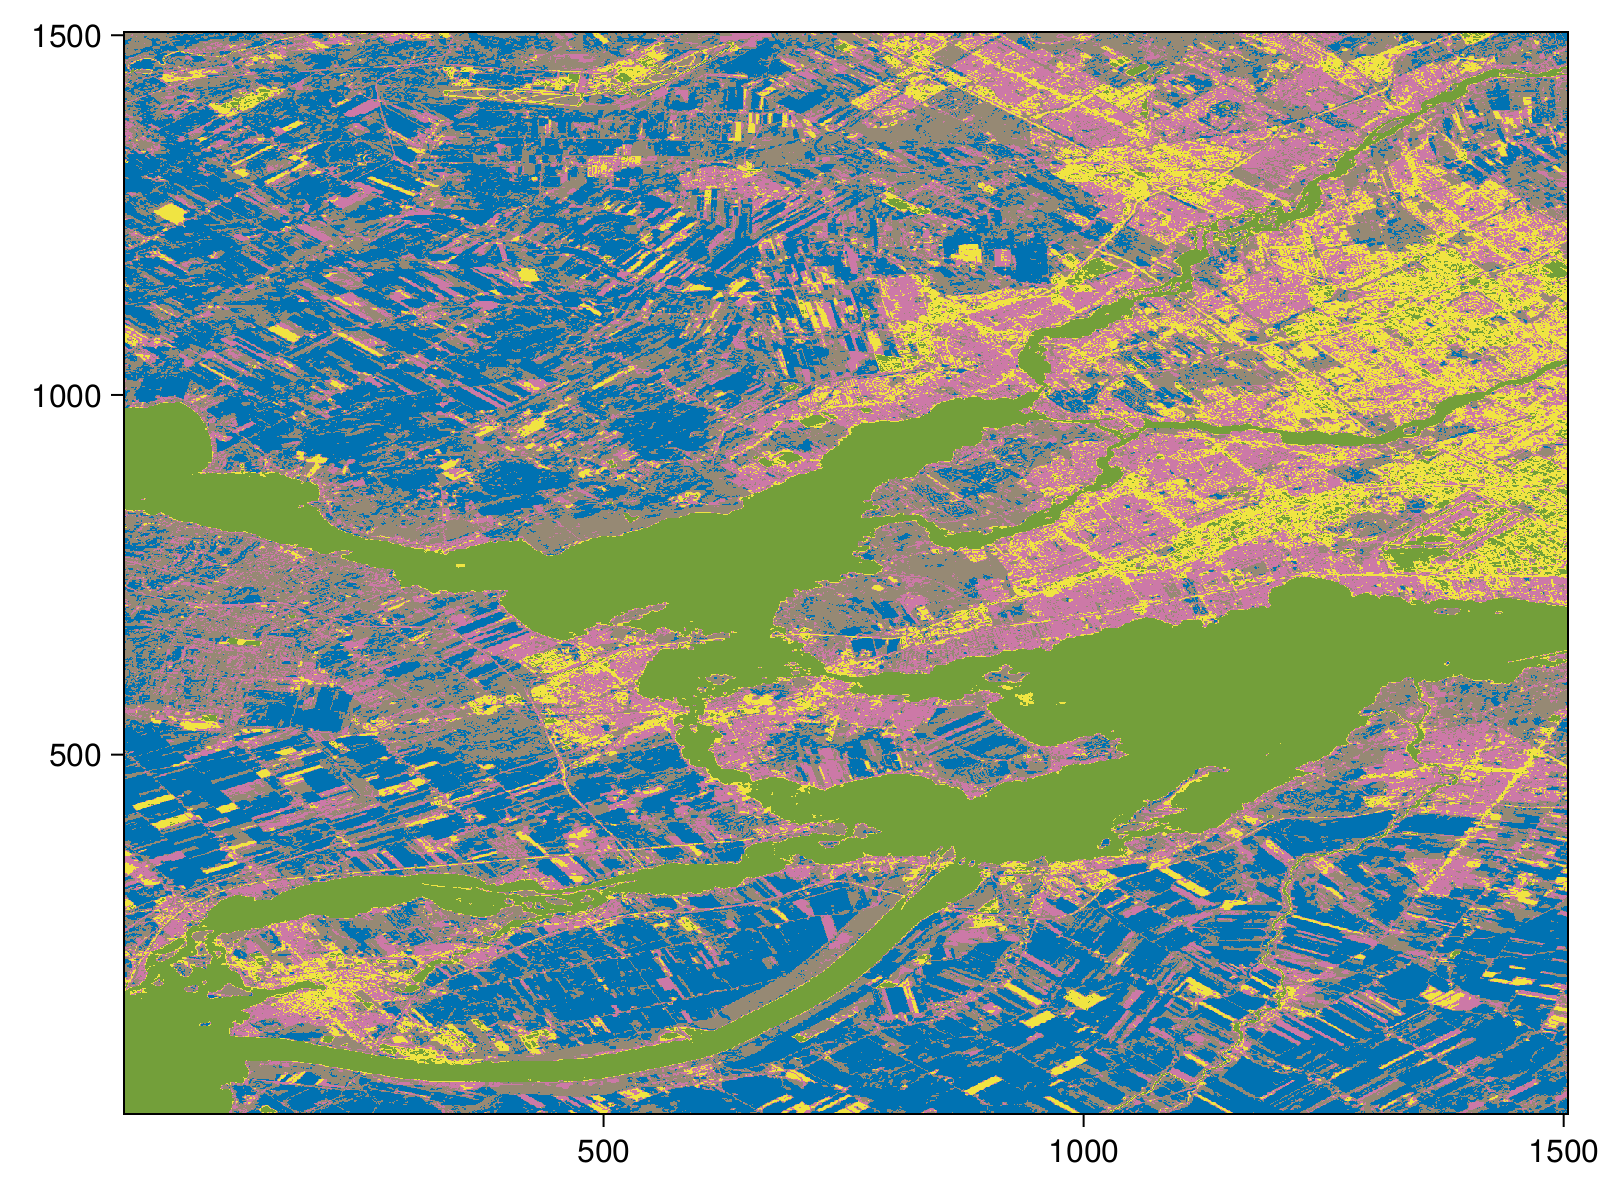

In [145]:
#| label: fig-classified-landscape
#| fig-cap: >
#|  After iterating the *k*-means algorithm, we obtain a classification for every pixel in the landscape.
#|  This classification is based on the values of NDVI and NDWI indices, and therefore groups pixels based on a specific hypothesis.
C = reshape(assignments(clusters), size(ndvi))
heatmap(permutedims(C); colormap=Makie.wong_colors())